In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
file_path = '/content/drive/MyDrive/predictions_attention.csv'
font_path = '/content/drive/MyDrive/MANGAL (1).TTF'

In [4]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.1/281.1 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
#!curl -SL https://drive.google.com/file/d/1c1wBJ4PGzfoZ2EshA532TnsuezfbbL_n/view?usp=drive_link

<ipython-input-19-6dc8b824ffb9>:69: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig(figure_path)
<ipython-input-19-6dc8b824ffb9>:69: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig(figure_path)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


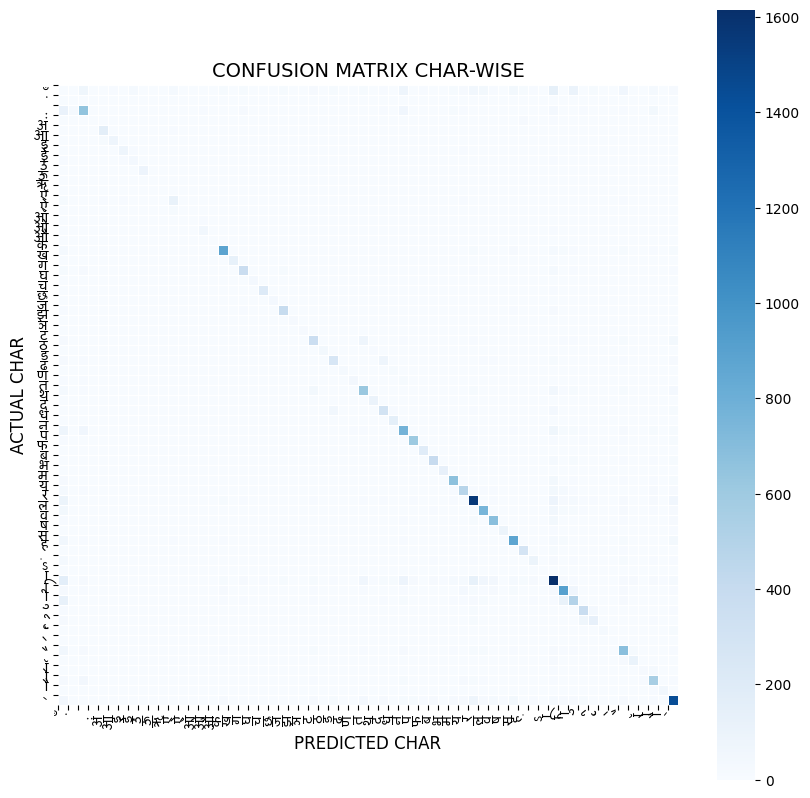

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import wandb

# Define the actual and predicted words
data = pd.read_csv(file_path,sep=",",names=['actual_X', 'actual_Y','predicted_Y'])
actual_words = data['actual_Y'].tolist()
predicted_words = data['predicted_Y'].tolist()

# padding words
for i in range(len(actual_words)):
    maxlen = max(len(actual_words[i]),len(predicted_words[i]))
    actual_words[i] += ' ' * (maxlen - len(actual_words[i]))
    predicted_words[i] += ' ' * (maxlen - len(predicted_words[i]))

# Create the confusion matrix character-wise
actual_chars = [char for word in actual_words for char in word]
predicted_chars = [char for word in predicted_words for char in word]

# Pad the lists if they have different lengths
max_length = max(len(actual_chars), len(predicted_chars))
actual_chars += [''] * (max_length - len(actual_chars))
predicted_chars += [''] * (max_length - len(predicted_chars))

# Get unique characters as labels
unique_chars = sorted(set(actual_chars + predicted_chars))

# Create the confusion matrix
num_labels = len(unique_chars)

# Initialize confusion matrix
confusion_mat = [[0] * num_labels for _ in range(num_labels)]

# Update confusion matrix
for actual, predicted in zip(actual_chars, predicted_chars):
    actual_idx = unique_chars.index(actual)
    predicted_idx = unique_chars.index(predicted)
    # print(actual_idx,predicted_idx)
    confusion_mat[actual_idx][predicted_idx] += 1

# Set a font that supports Devanagari characters
#font_path = "MANGAL.TTF"
font_prop = fm.FontProperties(fname=font_path)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
ax = sns.heatmap(confusion_mat, annot=False, fmt='d', cmap='Blues', linewidths=.5,square=True)
#ax = sns.heatmap(confusion_mat, annot=False, cmap='viridis', cbar=False, square=True)

tick_locations = list(range(len(unique_chars)))
ax.set_xticks(tick_locations)
ax.set_yticks(tick_locations)

ax.set_xticklabels(unique_chars, rotation=90, fontproperties=font_prop, fontsize=10)
ax.set_yticklabels(unique_chars, rotation=0, fontproperties=font_prop, fontsize=10)
plt
plt.title('CONFUSION MATRIX CHAR-WISE', fontsize=14)
plt.xlabel('PREDICTED CHAR', fontsize=12)
plt.ylabel('ACTUAL CHAR', fontsize=12)

wandb.init(project="Assifnment_3_att", entity="samruddhipatil2526",name="CONF_MATRIX_ATTENTION")
# Get the wandb log directory
log_dir = wandb.run.dir

# Save the figure to the log directory
figure_path = f"{log_dir}/CONF_MATRIX_ATTENTION.png"
plt.savefig(figure_path)

# Log the figure in wandb
wandb.log({"confusion_matrix_": wandb.Image(figure_path)})
wandb.finish()

# Display the figure
plt.show()